In [460]:
# TUGAS BESAR 2
# IF3170 Intelegensi Buatan
# Implementasi Naive Bayes Algorithm

# import module
import pandas as pd 
import numpy as np
import scipy.stats as stats
from colorama import Fore
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
import math

# membaca data dari file csv
colnames = ['battery_power', 'blue' , 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt',
            'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g' , 'touch_screen',
            'wifi', 'price_range']
col_numeric =['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
                  'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
                  'ram', 'sc_h', 'sc_w', 'talk_time']

df_train = pd.read_csv("../data/data_train.csv", header=None, skiprows=1)
df_train.columns = colnames
df_validation = pd.read_csv("../data/data_validation.csv", header=None, skiprows=1)
df_validation.columns = colnames

# menampilkan data
print("\n" + Fore.CYAN + '\033[1m' + "Data Train" + '\033[0m')
display(df_train)
print("\n" + Fore.CYAN + '\033[1m' + "Data Validation" + '\033[0m')
display(df_validation)


Data Train


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,536,1,1.4,0,0,1,53,0.7,135,3,...,547,705,1211,15,10,7,1,0,1,0
1396,1097,0,0.8,0,10,1,21,0.1,160,7,...,1277,1352,2219,15,6,12,1,0,1,2
1397,1179,1,0.5,0,7,1,32,0.3,182,2,...,85,1451,340,16,5,16,1,0,0,0
1398,719,1,0.5,1,0,1,23,0.4,113,6,...,431,1727,3990,14,9,12,1,1,1,3



Data Validation


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
2,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
3,775,0,1.0,0,3,0,46,0.7,159,2,...,862,1864,568,17,15,11,1,1,1,0
4,595,0,0.9,1,7,1,23,0.1,121,3,...,441,810,3752,10,2,18,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1547,1,2.9,0,2,0,57,0.4,114,1,...,347,957,1620,9,2,19,0,1,1,1
596,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
597,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
598,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2


In [461]:
# DATA PREPARATION
# Feature Selection
def select_features(data, target_column, threshold, feature_to_exclude=None):
    correlations = data.corr()[target_column].abs().sort_values(ascending=False)
    correlations = correlations.drop(target_column, errors='ignore')
    if feature_to_exclude:
        correlations = correlations.drop(feature_to_exclude, errors='ignore')
    if correlations.empty:
        selected_features = [data.corr()[target_column].abs().idxmax()]
    else:
        selected_features = correlations[correlations > threshold].index
    return selected_features

selected_col = select_features(df_train, 'price_range', 0.035)
df_train = df_train[selected_col.append(pd.Index(['price_range']))]
print("\n" + Fore.CYAN + '\033[1m' + "Selected Feature" + '\033[0m')
print(selected_col)


Selected Feature
Index(['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt', 'blue'], dtype='object')


In [462]:
class MixedNaiveBayes:
    def __init__(self, col_numeric):
        self.class_probabilities = {}
        self.feature_summaries = {}
        self.col_numeric = col_numeric

    def fit(self, X_train, Y_train):
        data = pd.concat([X_train, Y_train], axis=1)
        classes = Y_train.unique()

        for class_value in classes:
            class_data = data[data[Y_train.name] == class_value]
            self.class_probabilities[class_value] = len(class_data) / len(data)

            feature_summaries = {}
            for feature in X_train.columns:
                if feature in self.col_numeric:  # Numerical feature
                    feature_summary = self.summarize_numerical(class_data[feature])
                else:  # Categorical feature
                    feature_summary = self.summarize_categorical(class_data[feature])

                feature_summaries[feature] = feature_summary

            self.feature_summaries[class_value] = feature_summaries

    def summarize_categorical(self, data):
        category_counts = data.value_counts()
        total_count = category_counts.sum()
        probabilities = category_counts / total_count
        return probabilities

    def summarize_numerical(self, data):
        mean = data.mean()
        std = data.std()
        return mean, std

    def gaussian_prob(self, x, mean, std):
        exponent = math.exp(-((x - mean)**2) / (2 * std**2))
        return (1 / (math.sqrt(2 * math.pi) * std + 1e-9)) * exponent

    def calculate_class_prob(self, class_value, row):
        class_prob = self.class_probabilities[class_value]
        feature_probs = []

        for feature, value in row.items():
            if feature in self.col_numeric and feature in self.feature_summaries[class_value]:
                mean, std = self.feature_summaries[class_value][feature]
                feature_prob = self.gaussian_prob(value, mean, std)
            elif feature in self.feature_summaries[class_value]:
                feature_prob = self.feature_summaries[class_value][feature].get(value, 1e-9)
            else:
                continue

            feature_probs.append(feature_prob)

        return class_prob * math.prod(feature_probs)

    def predict(self, X_test):
        predictions = []

        for _, row in X_test.iterrows():
            class_probs = []

            for class_value in self.class_probabilities:
                prob = self.calculate_class_prob(class_value, row)
                class_probs.append((class_value, prob))

            predicted_class = max(class_probs, key=lambda x: x[1])[0]
            predictions.append(predicted_class)

        return predictions

target_column = 'price_range'
X_train = df_train.drop(columns=[target_column])
Y_train = df_train[target_column]
X_validation = df_validation.drop(columns=[target_column])

naive_bayes_model = MixedNaiveBayes(col_numeric)
naive_bayes_model.fit(X_train, Y_train)

predicted_labels = naive_bayes_model.predict(X_validation)
print(Fore.YELLOW + '\033[1m' + "\nPredicted labels: " + '\033[0m')
predicted_labels = pd.DataFrame(predicted_labels, columns=['price_range'])
display(predicted_labels)


Predicted labels: 


,price_range
0,2
1,2
2,3
3,0
4,3
...,...
595,1
596,3
597,0
598,1


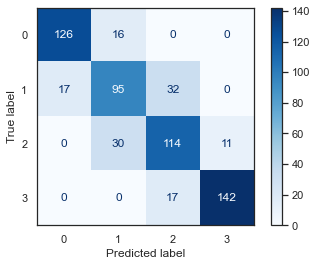


Accuracy: 
79.50%

Precision: 
79.56%

Recall: 
79.39%

F1 Score: 
79.45%


In [463]:
def show_stat(actual,predicted):
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=['0', '1', '2', '3'])
    cm_display.plot(cmap=plt.cm.Blues)
    plt.show()
    
    print(Fore.YELLOW + '\033[1m' + "\nAccuracy: " + '\033[0m')
    print(f"{metrics.accuracy_score(actual, predicted):.2%}")
    print(Fore.YELLOW + '\033[1m' + "\nPrecision: " + '\033[0m')
    print(f"{metrics.precision_score(actual, predicted, average='macro'):.2%}")
    print(Fore.YELLOW + '\033[1m' + "\nRecall: " + '\033[0m')
    print(f"{metrics.recall_score(actual, predicted, average='macro'):.2%}")
    print(Fore.YELLOW + '\033[1m' + "\nF1 Score: " + '\033[0m')
    print(f"{metrics.f1_score(actual, predicted, average='macro'):.2%}")

actual_labels = df_validation.iloc[:, -1]

show_stat(actual_labels, predicted_labels)


Scikit Naive Bayes Predicted labels: 


,price_range
0,2
1,2
2,3
3,0
4,3
...,...
595,1
596,3
597,0
598,1


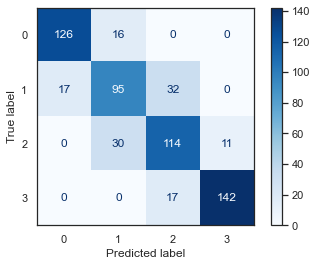


Accuracy: 
79.50%

Precision: 
79.56%

Recall: 
79.39%

F1 Score: 
79.45%


In [464]:
# Comparison with scikit model
scikit_nb = GaussianNB()
scikit_nb.fit(X_train, Y_train)

predicted_labels_scikit_nb = scikit_nb.predict(X_validation[selected_col])
predicted_labels_scikit_nb = pd.DataFrame(predicted_labels_scikit_nb, columns=['price_range'])
print(Fore.YELLOW + '\033[1m' + "\nScikit Naive Bayes Predicted labels: " + '\033[0m')
display(predicted_labels_scikit_nb)

show_stat(actual_labels, predicted_labels_scikit_nb)

In [465]:
import pickle

# save the model as a pickle file
nb_model_pkl_file = "nb_model.pkl"  

with open(nb_model_pkl_file, 'wb') as file:  
    pickle.dump(naive_bayes_model, file)


Predicted labels: 


,price_range
0,2
1,2
2,3
3,0
4,3
...,...
595,1
596,3
597,0
598,1


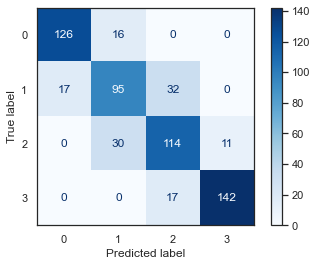


Accuracy: 
79.50%

Precision: 
79.56%

Recall: 
79.39%

F1 Score: 
79.45%


In [466]:
# load model from pickle file
nb_model_pkl_file = "nb_model.pkl"
with open(nb_model_pkl_file, 'rb') as file:  
    model_loaded = pickle.load(file)

# evaluate model 
predicted_labels_loaded = model_loaded.predict(X_validation)

# check results
print(Fore.YELLOW + '\033[1m' + "\nPredicted labels: " + '\033[0m')
predicted_labels_loaded = pd.DataFrame(predicted_labels_loaded, columns=['price_range'])
display(predicted_labels_loaded)

show_stat(actual_labels, predicted_labels_loaded)